In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [4]:
# Load your dataset
df = pd.read_csv('/content/data.csv', parse_dates=[0], index_col=0)

In [5]:
# Preprocess data
wind_speeds = df['Wind Speed (km/h)'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
wind_speeds_normalized = scaler.fit_transform(wind_speeds)

In [6]:
# Function to create the LSTM dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [7]:
# Define look_back
look_back = 500
X, Y = create_dataset(wind_speeds_normalized, look_back)

In [8]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [9]:
# Split the data keeping the last number of records for validation
X_train, X_test = X[0:-3], X[-3:]
Y_train, Y_test = Y[0:-3], Y[-3:]

In [10]:

# Define and compile the LSTM model
model = Sequential([ LSTM(100, input_shape=(1, look_back)), Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')
# Adam is a popular stochastic gradient descent optimization algorthim
# to find the model parameters that correspond to the best fit between predicted and actual outputs.


In [11]:
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1,)

Epoch 1/20
2999/2999 [==============================] - 16s 4ms/step - loss: 0.0041
Epoch 2/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0034
Epoch 3/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0032
Epoch 4/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0032
Epoch 5/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0032
Epoch 6/20
2999/2999 [==============================] - 13s 4ms/step - loss: 0.0031
Epoch 7/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0031
Epoch 8/20
2999/2999 [==============================] - 13s 4ms/step - loss: 0.0031
Epoch 9/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0031
Epoch 10/20
2999/2999 [==============================] - 13s 4ms/step - loss: 0.0031
Epoch 11/20
2999/2999 [==============================] - 12s 4ms/step - loss: 0.0031
Epoch 12/20
2999/2999 [==============================] - 12s 4ms/step - lo

In [12]:
# Predict the last n number values
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

# Actual last n values
actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

1/1 [==============================] - 0s 358ms/step


In [13]:
# Print the predictions and actual values
print("\nComparison of Predicted and Actual Wind Speeds:")
for i in range(len(predicted)):
    print(f"Hour {i+1}: Predicted = {predicted[i][0]:.2f} km/h, Actual = {actual[i][0]:.2f} km/h")

num_points = min(len(predicted), len(actual), 24)  # Restrict plotting upto 24 hours



Comparison of Predicted and Actual Wind Speeds:
Hour 1: Predicted = 10.07 km/h, Actual = 9.27 km/h
Hour 2: Predicted = 9.93 km/h, Actual = 9.24 km/h
Hour 3: Predicted = 9.85 km/h, Actual = 9.23 km/h


In [14]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.71
Mean Squared Error: 0.50
Root Mean Squared Error: 0.71


In [15]:
# Prepare the data
predicted_last_n = predicted[-num_points:]  # Get the last n points from predicted
actual_last_n = actual[-num_points:]  # Get the last n points from actual
hours = np.arange(1, num_points + 1)  # Hours from 1 to n


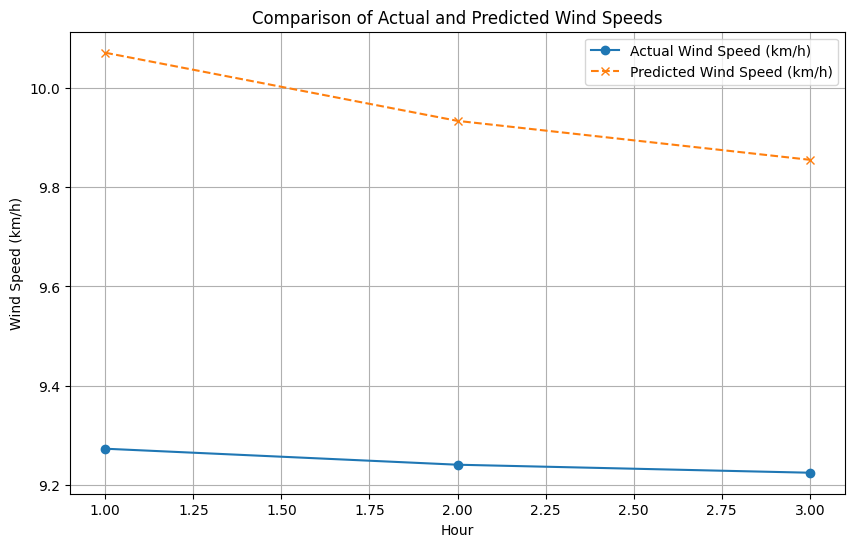

In [16]:
# Plotting the predicted and actual wind speeds
plt.figure(figsize=(10, 6))
plt.plot(hours, actual_last_n.flatten(), label='Actual Wind Speed (km/h)',marker='o')  # Flatten in case of 2D array
plt.plot(hours, predicted_last_n.flatten(), label='Predicted Wind Speed (km/h)', linestyle='--', marker='x')
plt.title('Comparison of Actual and Predicted Wind Speeds')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.show()